In [166]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [167]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [168]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import distinct

In [169]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [170]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [171]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [172]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.measurement

In [173]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [174]:
# Find the most recent date in the data set.
recent_data = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_data

('2017-08-23',)

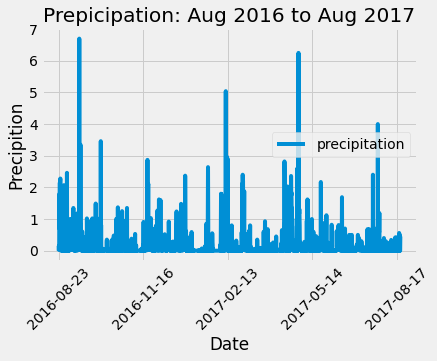

In [175]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
last_date = dt.date(2017,8,23) - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >=last_date).\
    order_by(Measurement.date).all()
precip_data[0]

# Save the query results as a Pandas DataFrame and set the index to the date column
precipt_df = pd.DataFrame(precip_data)
precipt_df=precipt_df.rename(columns={0:'date', 1:'precipitation'}).set_index('date')
# Sort the dataframe by date
precipt_df=precipt_df.sort_values(by='date').dropna()
precipt_df.head(None)
# Use Pandas Plotting with Matplotlib to plot the data
precipt_df.plot(rot=45)
plt.savefig("Precipitation analysis.png")
plt.title('Prepicipation: Aug 2016 to Aug 2017')
plt.xlabel('Date')
plt.ylabel('Precipition')

plt.savefig("Images/precipitation.png")
plt.show()


In [176]:
precipt_df.head(None)

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


In [177]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipt_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [178]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query((distinct(Measurement.station))).count()
print(f"Total Stations: {total_stations}")

Total Stations: 9


In [179]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
Active_Stations = (session.query(Measurement.station, func.count(Measurement.station), func.avg(Measurement.tobs)).\
                   group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all())
Most_Active = Active_Stations[0][0]
Active_Stations

[('USC00519281', 2772, 71.66378066378067),
 ('USC00519397', 2724, 74.55323054331865),
 ('USC00513117', 2709, 72.68918420081211),
 ('USC00519523', 2669, 74.5436493068565),
 ('USC00516128', 2612, 70.91500765696784),
 ('USC00514830', 2202, 74.8732970027248),
 ('USC00511918', 1979, 71.61596766043456),
 ('USC00517948', 1372, 74.68440233236151),
 ('USC00518838', 511, 72.72407045009784)]

In [180]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)).filter(Measurement.station == Most_Active).all()

[(54.0, 85.0, 71.66378066378067)]

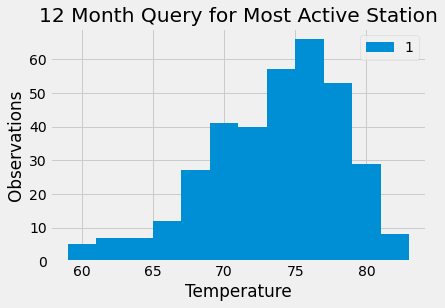

In [181]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_active_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >="2016-08-23").\
    filter(Measurement.date <="2017-08-23").\
    filter(Measurement.station == Most_Active).all()
active_df = pd.DataFrame(most_active_data)
active_df.plot.hist(bins=12)
plt.title("12 Month Query for Most Active Station")
plt.xlabel("Temperature")
plt.ylabel("Observations")
plt.savefig("Images/station-histogram.png")

# Close session

In [182]:
# Close Session
session.close()